# Instructions
- Assign 0 to the NumPy random seed to make the results reproducible with the same random factor.

- Create an empty list called “turn” and fill it up to start a for loop with 100,000 iterations, and then add each result to the list. In every loop, do the following:
    - Shuffle the deck randomly.
    - Pick the first 2 cards in the list as an initial hand to simulate taking the top 2 off the deck.
    - If the sum of the initial hand equals 22, alter the first 11 with 1. We utilize 1 of our 2 aces as 1 in an effort to stay lower than 21. In such a situation of starting with 2 aces, “splitting” the hand is also an option; however, we will disregard this case in our simulation.
    - If the sum of the hand is lower than 16, continue picking cards from the deck until the sum reaches or exceeds 16.
    - If the sum of hand exceeds 21, check if there is an 11 in the hand and alter it with 1. After the altering, if the sum drops below 16, go to the previous step and continue picking cards.
    - Add the total sum of the hand to the list as a result.

- Visualize the histogram of the list.
    - See the distribution and results of the simulation.

Won 10.9% of the time


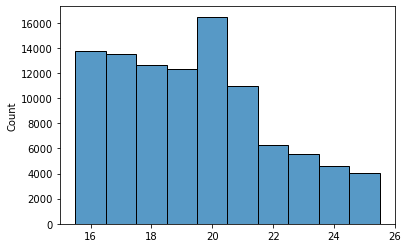

In [217]:
# %load baseline_strategy.py
import random
import seaborn as sb

random.seed(0)


def create_deck():
    """
    Create a list that represents the card deck

    Cards are represented by a number according to the following rules:
    - Cards from 2 to 10 are represented by their number
    - Jacks, Queens, and Kings (court cards) are represented by the number 10
    - Aces are represented by 11

    Card suits (clubs, diamonds, hearts, and spades) don't matter in the game, so they're not recorded.
    
    Copied from create_deck.py
    """
    numeric_cards = range(2,11)
    value_court_cards = 10
    n_court_cards = 3
    value_ace = 11

    cards_in_a_suit = list(numeric_cards) + [value_court_cards]*n_court_cards + [value_ace]
    deck = 4 * cards_in_a_suit

    return deck


def alter_ace(hand):
    hand.remove(11)
    hand.append(1)
    return hand


def simulate_one_game():
    THRESHOLD = 16
    
    deck = create_deck()
    random.shuffle(deck)
    
    hand = [deck.pop(), deck.pop()]

    # there are exactly 2 aces
    # so use use of them as 1 instead of 11
    if sum(hand) == 22:
        hand = alter_ace(hand)

    while sum(hand) < THRESHOLD:
        hand.append(deck.pop())
        if sum(hand) > 21 and 11 in hand:
            hand = alter_ace(hand)
    
    return hand


def simulate_n_games(n=100):
    results = [sum(simulate_one_game()) for i in range(n)]

    sb.histplot(results, discrete=True)
        
    pct_wins = 100 * (len([x for x in results if x == 21]) / n)
    print(f'Won {pct_wins:.1f}% of the time')


if __name__ == '__main__':
    simulate_n_games(100000)
